In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

,correct
vars,
1,0.523077
2,0.500000
3,0.440000
4,0.377778
5,0.133333


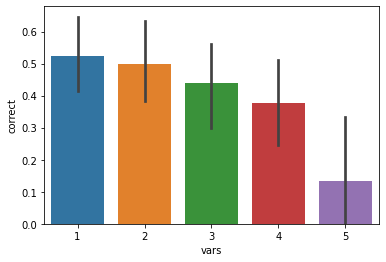

In [33]:
## include results 

results = pd.read_csv("random_results.xlsx")

results_needed_noise0 = results[["group", "size", "size_class", "vars", "true model",  "time", "correct ind", "correct"]]

sns.barplot(x='vars',y='correct', data=results_needed_noise0)

results_needed_noise0_gb_vars = results_needed_noise0.groupby(["vars"]).aggregate( {"correct": "mean"} )
results_needed_noise0_gb_vars

,correct
size,
3,1.00
4,0.90
5,1.00
6,0.80
7,0.75
8,0.65
9,0.65
10,0.20
11,0.20


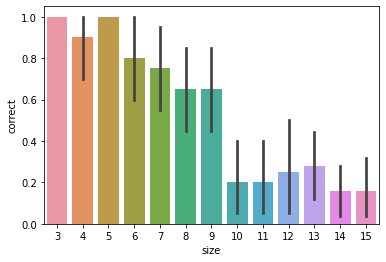

In [34]:
######################## exact percentages w.r.t. size of exact models

sns.barplot(x='size',y='correct', data=results_needed_noise0)

results_needed_noise0_gb_size = results_needed_noise0.groupby(["size"]).aggregate( {"correct": "mean"} )
results_needed_noise0_gb_size